# Data Fields

datetime:  
hourly date + timestamp  

season:  
1 = spring, 2 = summer, 3 = fall, 4 = winter  

holiday:  
whether the day is considered a holiday  

workingday:  
whether the day is neither a weekend nor holiday  

weather:  
1: Clear, Few clouds, Partly cloudy, Partly cloudy  
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog  

temp:  
temperature in Celsius  

atemp:  
"feels like" temperature in Celsius  

humidity:  
relative humidity  

windspeed:  
wind speed  

casual:  
number of non-registered user rentals initiated  

registered:  
number of registered user rentals initiated  

count:  
number of total rentals

# Importation datas

In [1]:
import calendar
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from datetime import datetime
from scipy import stats

from vivadata.datasets.common import get_path_for_dataset

%matplotlib inline
sns.set()

In [2]:
base_path = get_path_for_dataset('bike-sharing/train.csv')
base_path

'/home/fred/code/fred/vivadata-curriculum/cache/datasets/bike-sharing/train.csv'

In [3]:
df = pd.read_csv(os.path.join(base_path))

In [4]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# EDA

## Suppression des colonnes 'casual' et 'registered'

casual:
number of non-registered user rentals initiated 

registered:
number of registered user rentals initiated 

In [5]:
drop_lst = ['casual', 'registered']
df = df.drop(drop_lst, axis=1)
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
count         10886 non-null int64
dtypes: float64(3), int64(6), object(1)
memory usage: 850.5+ KB


In [7]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,977.000000


# Analyses univariées

## TARGET: Count

count:
number of total rentals

In [8]:
df['count'].head()

0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [9]:
df['count'].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

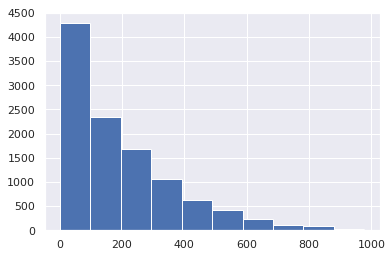

In [10]:
plt.hist(df['count']);

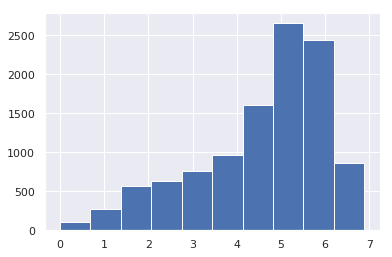

In [11]:
count_log = np.log(df['count'])
plt.hist(count_log);

**Right skew avec le logarithme de la feature 'count'**

In [12]:
count_boxcox, _ = stats.boxcox(df['count'])
count_boxcox

array([ 4.43314545,  6.98267424,  6.29227393, ..., 12.79939255,
       11.5219654 ,  9.85125836])

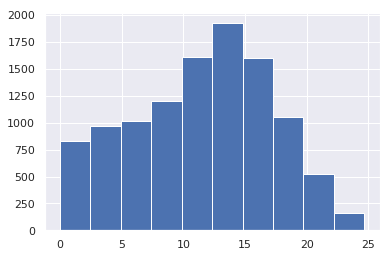

In [13]:
plt.hist(count_boxcox);

**Avec la fonction boxcox, on a une répartition presque normale.**

In [14]:
df['count_log'] = count_log
df['count_boxcox'] = count_boxcox

In [15]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,count_log,count_boxcox
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,2.772589,4.433145
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,3.688879,6.982674
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,3.465736,6.292274
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,2.564949,3.950910
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,0.000000,0.000000


**Ajout des features count_log et count_boxcox dans la dataframe.**

## Datetime

datetime:
hourly date + timestamp 

In [16]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [17]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,count_log,count_boxcox
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,2.772589,4.433145
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,3.688879,6.982674
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,3.465736,6.292274
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,2.564949,3.950910
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,0.000000,0.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime        10886 non-null datetime64[ns]
season          10886 non-null int64
holiday         10886 non-null int64
workingday      10886 non-null int64
weather         10886 non-null int64
temp            10886 non-null float64
atemp           10886 non-null float64
humidity        10886 non-null int64
windspeed       10886 non-null float64
count           10886 non-null int64
count_log       10886 non-null float64
count_boxcox    10886 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(6)
memory usage: 1020.6 KB


In [19]:
df['dow'] = df['datetime'].dt.dayofweek
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,count_log,count_boxcox,dow
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,2.772589,4.433145,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,3.688879,6.982674,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,3.465736,6.292274,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,2.564949,3.950910,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,0.000000,0.000000,5


In [20]:
df['month'] = df['datetime'].dt.month
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,count_log,count_boxcox,dow,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,2.772589,4.433145,5,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,3.688879,6.982674,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,3.465736,6.292274,5,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,2.564949,3.950910,5,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,0.000000,0.000000,5,1


In [21]:
df['week'] = df['datetime'].dt.week
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,count_log,count_boxcox,dow,month,week
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,2.772589,4.433145,5,1,52
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,3.688879,6.982674,5,1,52
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,3.465736,6.292274,5,1,52
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,2.564949,3.950910,5,1,52
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,0.000000,0.000000,5,1,52


In [22]:
df['hour'] = df['datetime'].dt.hour
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,count_log,count_boxcox,dow,month,week,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,2.772589,4.433145,5,1,52,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,3.688879,6.982674,5,1,52,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,3.465736,6.292274,5,1,52,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,2.564949,3.950910,5,1,52,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,0.000000,0.000000,5,1,52,4


In [23]:
df['year'] = df['datetime'].dt.year
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,count_log,count_boxcox,dow,month,week,hour,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,2.772589,4.433145,5,1,52,0,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,3.688879,6.982674,5,1,52,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,3.465736,6.292274,5,1,52,2,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,2.564949,3.950910,5,1,52,3,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,0.000000,0.000000,5,1,52,4,2011


In [24]:
df['day'] = df['datetime'].dt.day
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,count_log,count_boxcox,dow,month,week,hour,year,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,2.772589,4.433145,5,1,52,0,2011,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,3.688879,6.982674,5,1,52,1,2011,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,3.465736,6.292274,5,1,52,2,2011,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,2.564949,3.950910,5,1,52,3,2011,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,0.000000,0.000000,5,1,52,4,2011,1


In [25]:
df = df.set_index(df['datetime'])
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,count_log,count_boxcox,dow,month,week,hour,year,day
datetime,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,2.772589,4.433145,5,1,52,0,2011,1
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,3.688879,6.982674,5,1,52,1,2011,1
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,3.465736,6.292274,5,1,52,2,2011,1
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,2.564949,3.950910,5,1,52,3,2011,1
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,0.000000,0.000000,5,1,52,4,2011,1


In [26]:
df = df.drop(labels='datetime', axis=1)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,count_log,count_boxcox,dow,month,week,hour,year,day
datetime,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,2.772589,4.433145,5,1,52,0,2011,1
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,3.688879,6.982674,5,1,52,1,2011,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,3.465736,6.292274,5,1,52,2,2011,1
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,2.564949,3.950910,5,1,52,3,2011,1
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,0.000000,0.000000,5,1,52,4,2011,1


## seasons

season:
1 = spring, 2 = summer, 3 = fall, 4 = winter 

In [27]:
df['season'].describe()

count    10886.000000
mean         2.506614
std          1.116174
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          4.000000
Name: season, dtype: float64

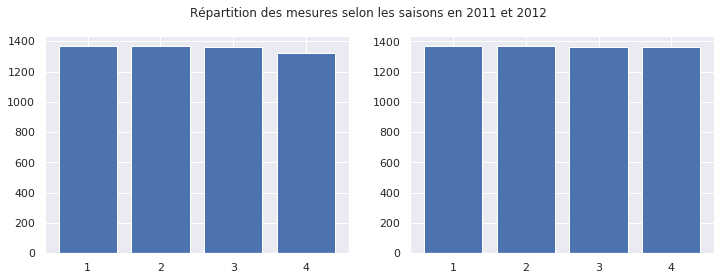

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

names = ['1', '2', '3', '4']

values = df['season'][df['year'] == 2011].value_counts()
ax[0].bar(names, values)

values = df['season'][df['year'] == 2012].value_counts()
ax[1].bar(names, values)

fig.suptitle('Répartition des mesures selon les saisons en 2011 et 2012');

In [29]:
spring_2011 = int(df['season'][df['season'] == 1][df['year'] == 2011].value_counts())
summer_2011 = int(df['season'][df['season'] == 2][df['year'] == 2011].value_counts())
fall_2011 = int(df['season'][df['season'] == 3][df['year'] == 2011].value_counts())
winter_2011 = int(df['season'][df['season'] == 4][df['year'] == 2011].value_counts())

spring_2012 = int(df['season'][df['season'] == 1][df['year'] == 2012].value_counts())
summer_2012 = int(df['season'][df['season'] == 2][df['year'] == 2012].value_counts())
fall_2012 = int(df['season'][df['season'] == 3][df['year'] == 2012].value_counts())
winter_2012 =int(df['season'][df['season'] == 4][df['year'] == 2012].value_counts())

print("Nombre de mesures au Printemps 2011: {}".format(spring_2011))
print("Nombre de mesures en Eté 2011: {}".format(summer_2011))
print("Nombre de mesures en Automne 2011: {}".format(fall_2011))
print("Nombre de mesures en Hiver 2011: {}".format(winter_2011))
print("-----------------------------------------")
print("Nombre de mesures au Printemps 2012: {}".format(spring_2012))
print("Nombre de mesures en Eté 2012: {}".format(summer_2012))
print("Nombre de mesures en Automne 2012: {}".format(fall_2012))
print("Nombre de mesures en Hiver 2012: {}".format(winter_2012))

Nombre de mesures au Printemps 2011: 1323
Nombre de mesures en Eté 2011: 1367
Nombre de mesures en Automne 2011: 1365
Nombre de mesures en Hiver 2011: 1367
-----------------------------------------
Nombre de mesures au Printemps 2012: 1363
Nombre de mesures en Eté 2012: 1366
Nombre de mesures en Automne 2012: 1368
Nombre de mesures en Hiver 2012: 1367


**Il n'y a pas de différence concernant la répartition des mesures au-niveau des saisons pour les deux années.**

## Holiday

holiday:
whether the day is considered a holiday 

In [30]:
df['holiday'].describe()

count    10886.000000
mean         0.028569
std          0.166599
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: holiday, dtype: float64

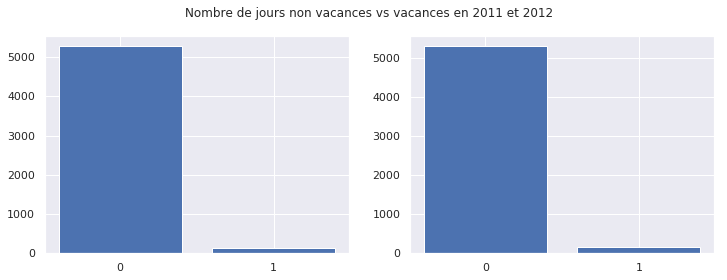

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

names = ['0', '1']

values = df['holiday'][df['year'] == 2011].value_counts()
ax[0].bar(names, values)

values = df['holiday'][df['year'] == 2012].value_counts()
ax[1].bar(names, values)

fig.suptitle('Nombre de jours non vacances vs vacances en 2011 et 2012');

In [32]:
no_holiday_2011 = int(df['holiday'][df['holiday'] == 0][df['year'] == 2011].value_counts())
holiday_2011 = int(df['holiday'][df['holiday'] == 1][df['year'] == 2011].value_counts())
no_holiday_2012 = int(df['holiday'][df['holiday'] == 0][df['year'] == 2012].value_counts())
holiday_2012 = int(df['holiday'][df['holiday'] == 1][df['year'] == 2012].value_counts())

print("Nombre de jours non vacances en 2011: {}".format(no_holiday_2011))
print("Nombre de jours non vacances en 2012: {}".format(no_holiday_2012))
print("Nombre de jours de vacances en 2011: {}".format(holiday_2011))
print("Nombre de jours de vacances en 2012: {}".format(holiday_2012))
print('----------------')
total_2011 = no_holiday_2011 + holiday_2011
total_2012 = no_holiday_2012 + holiday_2012
print('Nombre de jours non vacances en 2011: {:.0f}%'.format(no_holiday_2011 / total_2011 * 100))
print('Nombre de jours non vacances en 2012: {:.0f}%'.format(no_holiday_2012 / total_2012 * 100))

Nombre de jours non vacances en 2011: 5278
Nombre de jours non vacances en 2012: 5297
Nombre de jours de vacances en 2011: 144
Nombre de jours de vacances en 2012: 167
----------------
Nombre de jours non vacances en 2011: 97%
Nombre de jours non vacances en 2012: 97%


**On observe une nette différence dans la répartition des jours de vacances pour les deux années.**

## Working day

workingday:
whether the day is neither a weekend nor holiday 

In [33]:
df['workingday'].describe()

count    10886.000000
mean         0.680875
std          0.466159
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: workingday, dtype: float64

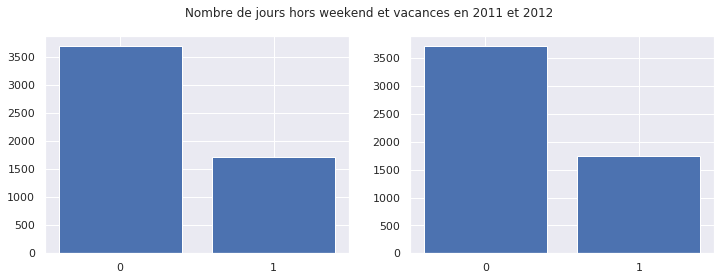

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

names = ['0', '1']

values = df['workingday'][df['year'] == 2011].value_counts()
ax[0].bar(names, values)

values = df['workingday'][df['year'] == 2012].value_counts()
ax[1].bar(names, values)

fig.suptitle('Nombre de jours hors weekend et vacances en 2011 et 2012');

In [35]:
no_workingday_2011 = int(df['workingday'][df['workingday'] == 0][df['year'] == 2011].value_counts())
workingday_2011 = int(df['workingday'][df['workingday'] == 1][df['year'] == 2011].value_counts())
no_workingday_2012 = int(df['workingday'][df['workingday'] == 0][df['year'] == 2012].value_counts())
workingday_2012 = int(df['workingday'][df['workingday'] == 1][df['year'] == 2012].value_counts())

print("Nombre de jours weekend/vacances en 2011: {}".format(no_workingday_2011))
print("Nombre de jours hors weekend et vacances en 2011: {}".format(workingday_2011))
print("Nombre de jours weekend/vacances en 2011: {}".format(no_workingday_2012))
print("Nombre de jours hors weekend et vacances en 2011: {}".format(workingday_2012))
print('----------------')
total_2011 = no_workingday_2011 + workingday_2011
total_2012 = no_workingday_2012 + workingday_2012
print('Nombre de jours weekend/vacances en 2011: {:.0f}%'.format(no_workingday_2011 / total_2011 * 100))
print('Nombre de jours weekend/vacances en 2012: {:.0f}%'.format(no_workingday_2012 / total_2012 * 100))

Nombre de jours weekend/vacances en 2011: 1724
Nombre de jours hors weekend et vacances en 2011: 3698
Nombre de jours weekend/vacances en 2011: 1750
Nombre de jours hors weekend et vacances en 2011: 3714
----------------
Nombre de jours weekend/vacances en 2011: 32%
Nombre de jours weekend/vacances en 2012: 32%


**On a une différence de répartition des jours hors weekend et vacances pour les deux années.**

## weather

weather:  
1: Clear, Few clouds, Partly cloudy, Partly cloudy  
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog   

In [36]:
df['weather'].describe()

count    10886.000000
mean         1.418427
std          0.633839
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: weather, dtype: float64

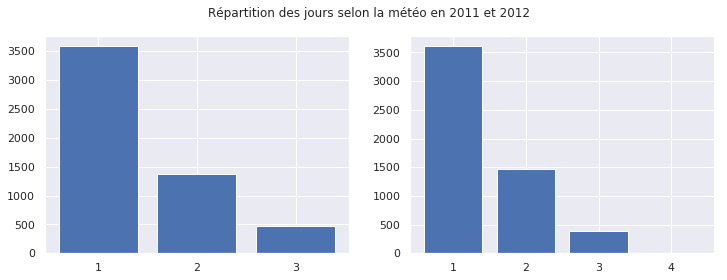

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

names_2011 = ['1', '2', '3']
names_2012 = ['1', '2', '3', '4']

values = df['weather'][df['year'] == 2011].value_counts()
ax[0].bar(names_2011, values)

values = df['weather'][df['year'] == 2012].value_counts()
ax[1].bar(names_2012, values)

fig.suptitle('Répartition des jours selon la météo en 2011 et 2012');

In [38]:
weather_2011_1 = df['weather'][df['weather'] == 1][df['year'] == 2011].value_counts()
weather_2011_2 = df['weather'][df['weather'] == 2][df['year'] == 2011].value_counts()
weather_2011_3 = df['weather'][df['weather'] == 3][df['year'] == 2011].value_counts()

weather_2012_1 = df['weather'][df['weather'] == 1][df['year'] == 2012].value_counts()
weather_2012_2 = df['weather'][df['weather'] == 2][df['year'] == 2012].value_counts()
weather_2012_3 = df['weather'][df['weather'] == 3][df['year'] == 2012].value_counts()
weather_2012_4 = df['weather'][df['weather'] == 4][df['year'] == 2012].value_counts()

print('Nombre de jours weather_1 en 2011: {}'.format(int(weather_2011_1)))
print('Nombre de jours weather_2 en 2011: {}'.format(int(weather_2011_2)))
print('Nombre de jours weather_3 en 2011: {}'.format(int(weather_2011_3)))
print('--------------')
print('Nombre de jours weather_1 en 2012: {}'.format(int(weather_2012_1)))
print('Nombre de jours weather_2 en 2012: {}'.format(int(weather_2012_2)))
print('Nombre de jours weather_3 en 2012: {}'.format(int(weather_2012_3)))
print('Nombre de jours weather_4 en 2012: {}'.format(int(weather_2012_4)))
print('---------------')
total_2011 = int(weather_2011_1) + int(weather_2011_2) + int(weather_2011_3)
total_2012 = int(weather_2012_1) + int(weather_2012_2) + int(weather_2012_3) + int(weather_2012_4)
print('Nombre de jours weather_1 en 2011: {:.0f}%'.format(int(weather_2011_1) / int(total_2011) * 100))
print('Nombre de jours weather_2 en 2011: {:.0f}%'.format(int(weather_2011_2) / int(total_2011) * 100))
print('Nombre de jours weather_3 en 2011: {:.0f}%'.format(int(weather_2011_3) / int(total_2011) * 100))
print('--------------')
print('Nombre de jours weather_1 en 2012: {:.0f}%'.format(int(weather_2012_1) / int(total_2012) * 100))
print('Nombre de jours weather_2 en 2012: {:.0f}%'.format(int(weather_2012_2) / int(total_2012) * 100))
print('Nombre de jours weather_3 en 2012: {:.0f}%'.format(int(weather_2012_3) / int(total_2012) * 100))
print('Nombre de jours weather_4 en 2012: {:.0f}%'.format(int(weather_2012_4) / int(total_2012) * 100))

Nombre de jours weather_1 en 2011: 3583
Nombre de jours weather_2 en 2011: 1366
Nombre de jours weather_3 en 2011: 473
--------------
Nombre de jours weather_1 en 2012: 3609
Nombre de jours weather_2 en 2012: 1468
Nombre de jours weather_3 en 2012: 386
Nombre de jours weather_4 en 2012: 1
---------------
Nombre de jours weather_1 en 2011: 66%
Nombre de jours weather_2 en 2011: 25%
Nombre de jours weather_3 en 2011: 9%
--------------
Nombre de jours weather_1 en 2012: 66%
Nombre de jours weather_2 en 2012: 27%
Nombre de jours weather_3 en 2012: 7%
Nombre de jours weather_4 en 2012: 0%


**On observe une différence de répartition des jours selon la météo pour les deux années.**

## Temp

temp:
temperature in Celsius

In [39]:
df['temp'].describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

**Pas d'outliers.**

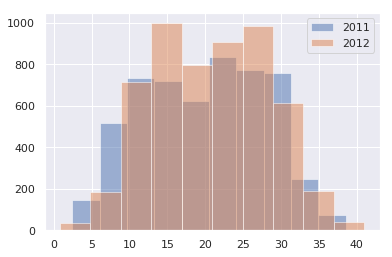

In [40]:
plt.hist(df['temp'][df['year'] == 2011], alpha=0.5, label='2011')
plt.hist(df['temp'][df['year'] == 2012], alpha=0.5, label='2012')

plt.legend(loc='upper right');

**Répartition normale des températures pour les deux années.**

## Atemp

atemp:
"feels like" temperature in Celsius 

In [41]:
df['atemp'].describe()

count    10886.000000
mean        23.655084
std          8.474601
min          0.760000
25%         16.665000
50%         24.240000
75%         31.060000
max         45.455000
Name: atemp, dtype: float64

**Pas d'outliers.**

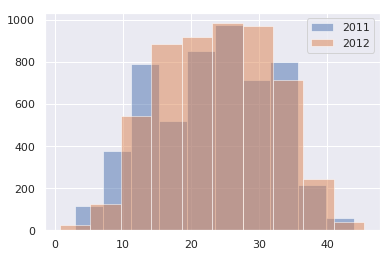

In [42]:
plt.hist(df['atemp'][df['year'] == 2011], alpha=0.5, label='2011')
plt.hist(df['atemp'][df['year'] == 2012], alpha=0.5, label='2012')

plt.legend(loc='upper right');

**Répartition normale des températures resenties pour les deux années.**

## Humidity

humidity:
relative humidity 

In [43]:
df['humidity'].describe()

count    10886.000000
mean        61.886460
std         19.245033
min          0.000000
25%         47.000000
50%         62.000000
75%         77.000000
max        100.000000
Name: humidity, dtype: float64

**Pas d'outliers.**

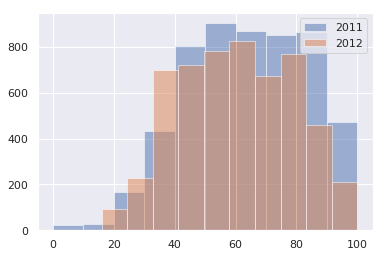

In [44]:
plt.hist(df['humidity'][df['year'] == 2011], alpha=0.5, label='2011')
plt.hist(df['humidity'][df['year'] == 2012], alpha=0.5, label='2012')

plt.legend(loc='upper right');

**Distribution right skew des taux d'humidité pour les deux années.**

## windspeed

windspeed:
wind speed

In [45]:
df['windspeed'].describe()

count    10886.000000
mean        12.799395
std          8.164537
min          0.000000
25%          7.001500
50%         12.998000
75%         16.997900
max         56.996900
Name: windspeed, dtype: float64

**Pas d'outliers.**

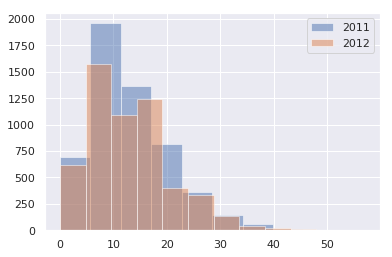

In [46]:
plt.hist(df['windspeed'][df['year'] == 2011], alpha=0.5, label='2011')
plt.hist(df['windspeed'][df['year'] == 2012], alpha=0.5, label='2012')

plt.legend(loc='upper right');

**Distribution Left skew de la vitesse du vent pour les deux années.**

## DayOfWeek

Monday = 0  
Sunday = 6

In [47]:
df['dow'].describe()

count    10886.000000
mean         3.013963
std          2.004585
min          0.000000
25%          1.000000
50%          3.000000
75%          5.000000
max          6.000000
Name: dow, dtype: float64

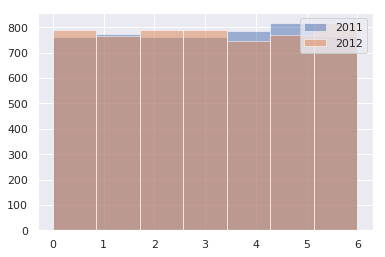

In [48]:
plt.hist(df['dow'][df['year'] == 2011], alpha=0.5, label='2011', bins=7)
plt.hist(df['dow'][df['year'] == 2012], alpha=0.5, label='2012', bins=7)

plt.legend(loc='upper right');

**Pas de surprise dans la répartition des jours dans le dataset pour les deux années**

## Month

January = 0  
December = 12

In [49]:
df['month'].describe()

count    10886.000000
mean         6.521495
std          3.444373
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64

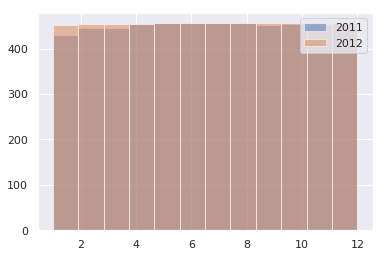

In [50]:
plt.hist(df['month'][df['year'] == 2011], alpha=0.5, label='2011', bins=12)
plt.hist(df['month'][df['year'] == 2012], alpha=0.5, label='2012', bins=12)

plt.legend(loc='upper right');

**Pas de surprise dans la répartition des mois dans le dataset pour les deux années.**

## Week

1 to 52

In [51]:
df['week'].describe()

count    10886.000000
mean        25.917784
std         15.017269
min          1.000000
25%         14.000000
50%         26.000000
75%         40.000000
max         52.000000
Name: week, dtype: float64

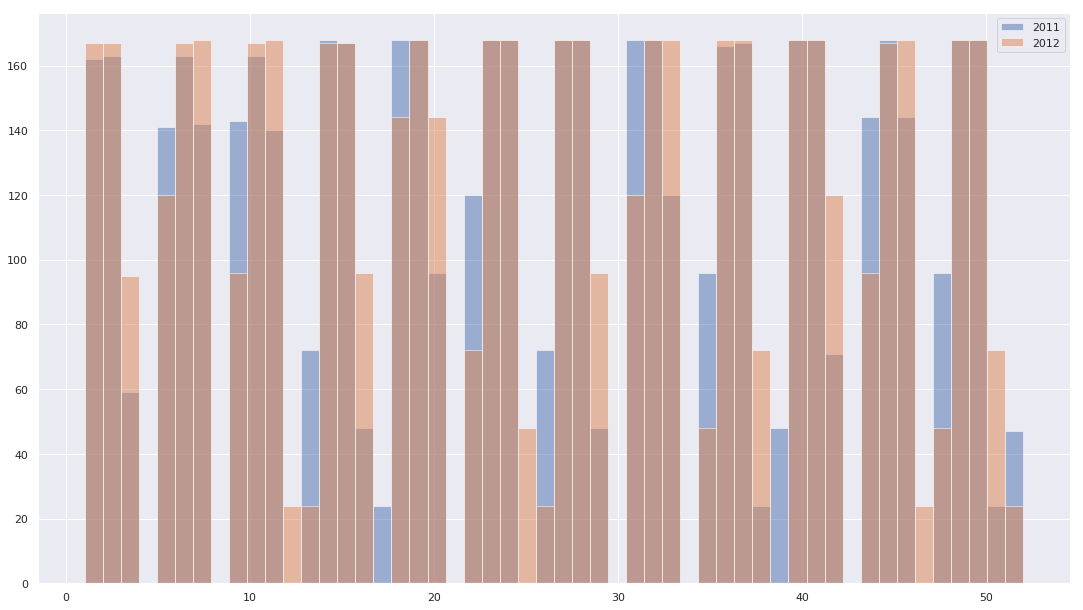

In [52]:
plt.hist(df['week'][df['year'] == 2011], alpha=0.5, label='2011', bins=52)
plt.hist(df['week'][df['year'] == 2012], alpha=0.5, label='2012', bins=52)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.legend(loc='upper right');

**La répartition des semaines dans le dataset est étrange mais elle est lié au fait que l'on a que les données pour les 20 premiers jours de chaque mois.**

## Hour

0 to 23

In [53]:
df['hour'].describe()

count    10886.000000
mean        11.541613
std          6.915838
min          0.000000
25%          6.000000
50%         12.000000
75%         18.000000
max         23.000000
Name: hour, dtype: float64

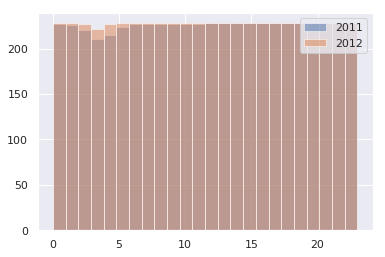

In [54]:
plt.hist(df['hour'][df['year'] == 2011], alpha=0.5, label='2011', bins=24)
plt.hist(df['hour'][df['year'] == 2012], alpha=0.5, label='2012', bins=24)
plt.legend(loc='upper right');

**Pas de surprise concernant la répartition des heures dans le dataset pour les deux années.**

## Day

1 to 31

In [55]:
df['day'].describe()

count    10886.000000
mean         9.992559
std          5.476608
min          1.000000
25%          5.000000
50%         10.000000
75%         15.000000
max         19.000000
Name: day, dtype: float64

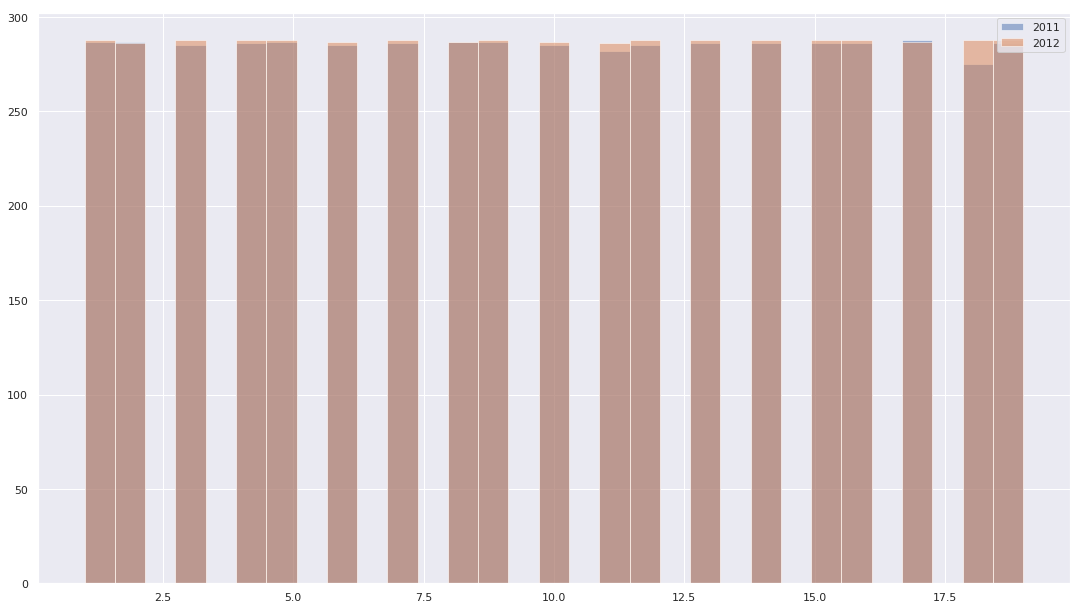

In [56]:
plt.hist(df['day'][df['year'] == 2011], alpha=0.5, label='2011', bins=31)
plt.hist(df['day'][df['year'] == 2012], alpha=0.5, label='2012', bins=31)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.legend(loc='upper right');

**Le dataset ne contient des données que pour les 19 premiers jours de chaque mois et ce pour les deux années.**

## Year

2011-2012

In [57]:
df['year'].describe()

count    10886.000000
mean      2011.501929
std          0.500019
min       2011.000000
25%       2011.000000
50%       2012.000000
75%       2012.000000
max       2012.000000
Name: year, dtype: float64

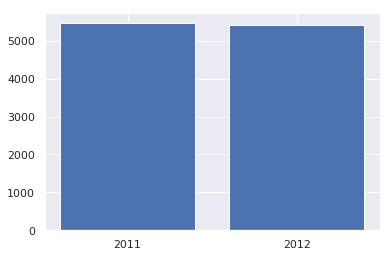

In [58]:
names = ['2011', '2012']
values = df['year'].value_counts()
plt.bar(names, values);

In [59]:
count_2011 = df['year'][df['year'] == 2011].count()
count_2012 = df['year'][df['year'] == 2012].count()

print('Nombre de mesures en 2011: {}'.format(count_2011))
print('Nombre de mesures en 2012: {}'.format(count_2012))

Nombre de mesures en 2011: 5422
Nombre de mesures en 2012: 5464


**Nombre de mesures homogènes entre les deux années.**

# Analyses multivariées

## Heatmap

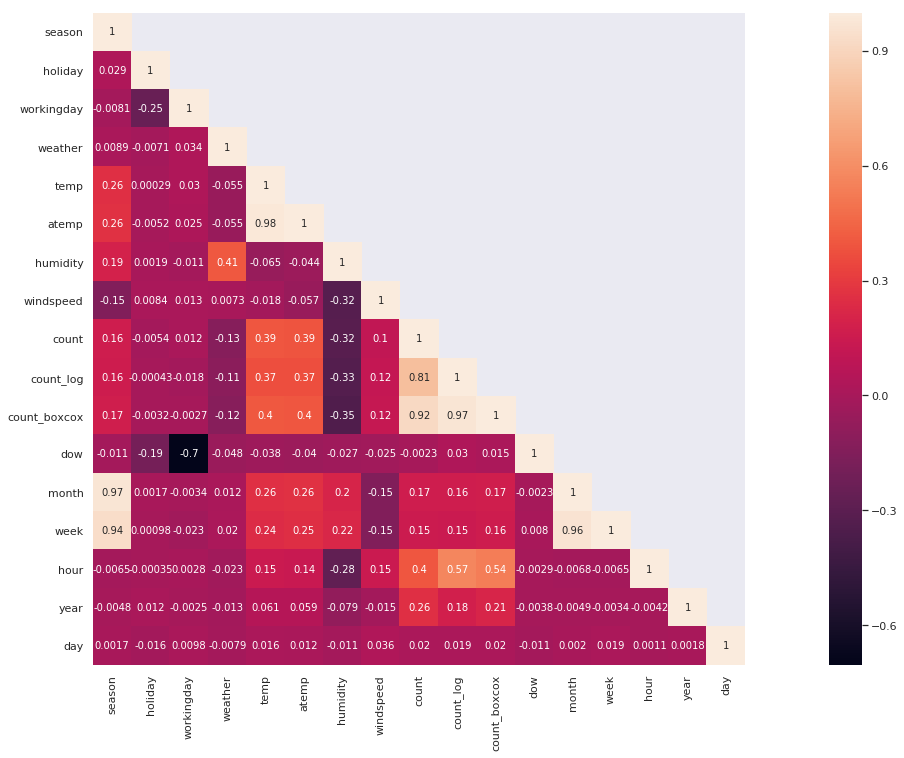

In [60]:
cor_mat = df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig = plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat, mask=mask, square=True, annot=True, cbar=True);

**Les corrélations avec les features 'count_log' et 'count_boxcox' sont les mêmes qu'avec 'count', ce qui est logique.**

## Count/temp

/home/fred/bin/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


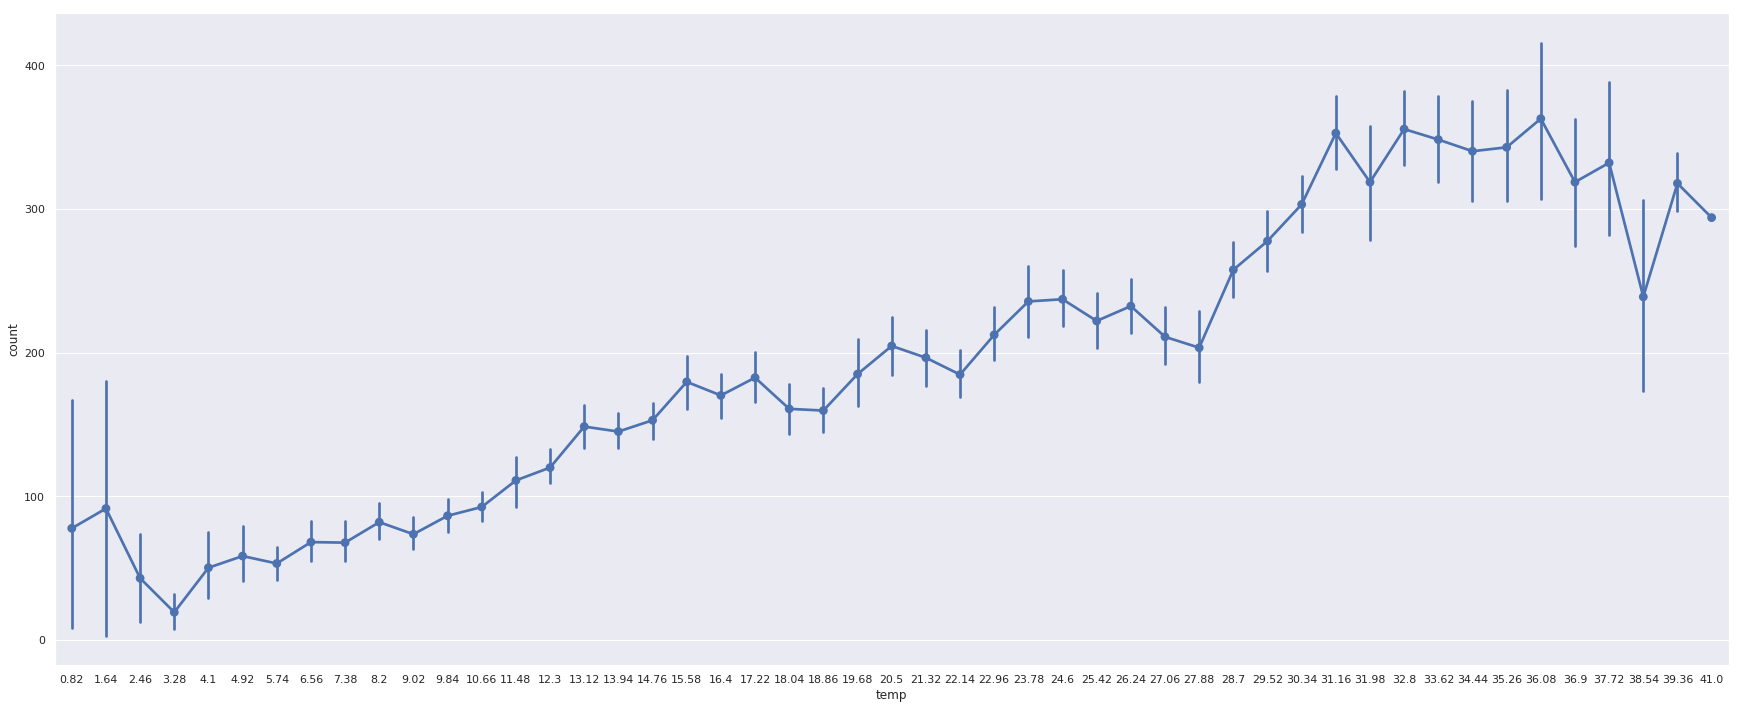

In [61]:
sns.pointplot(x=df['temp'], y=df['count'])
fig = plt.gcf()
fig.set_size_inches(30,12);

In [62]:
from scipy import stats
_, _, r_value, _, _ = stats.linregress(df['count'], df['temp'])
r_square = r_value ** 2
r_square.round(2)

0.16

**Les locations augmentent en fonction de la température.**

## Count/Atemp

/home/fred/bin/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


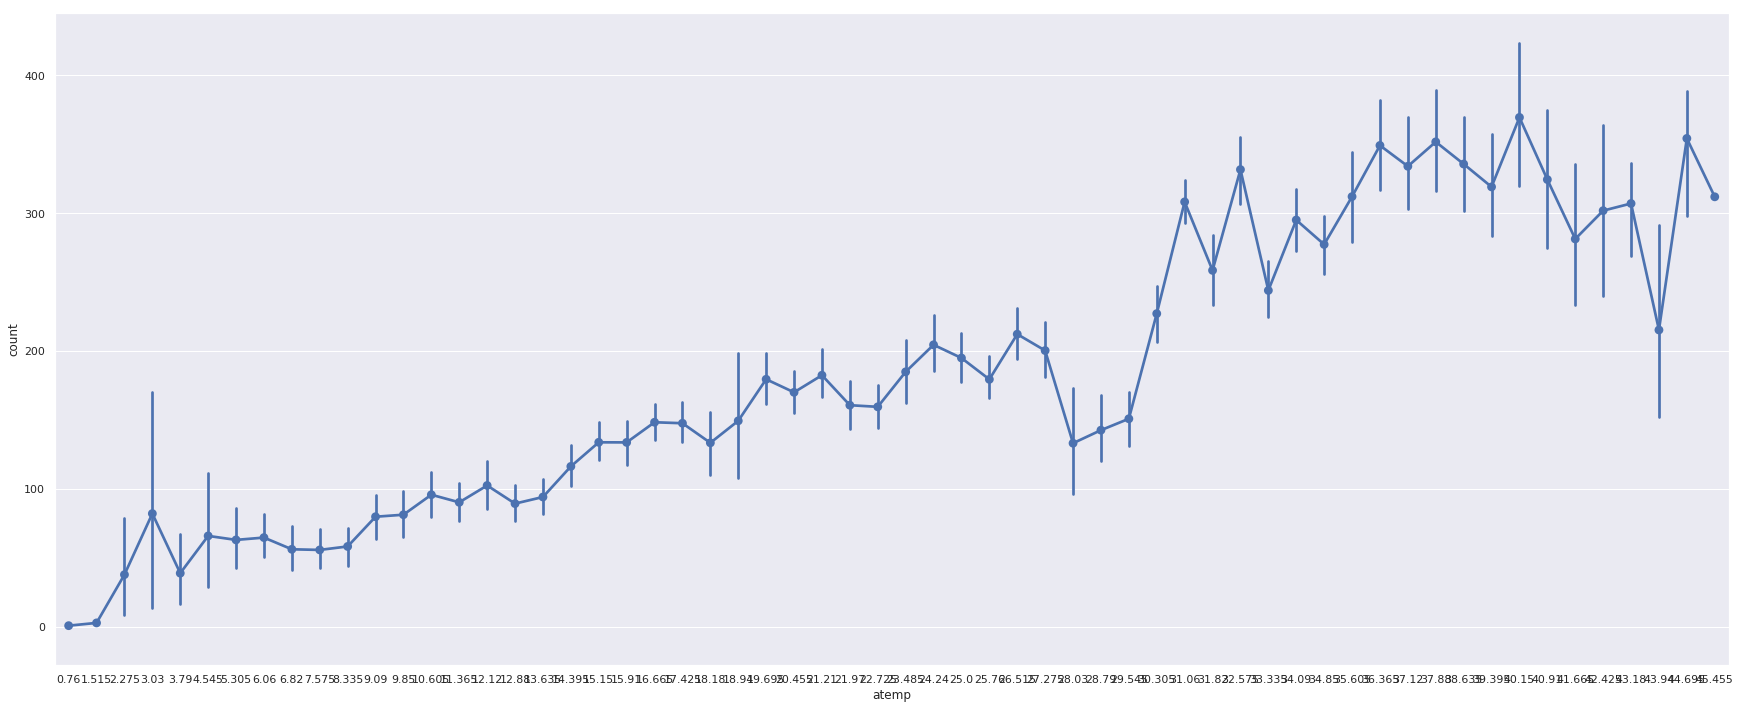

In [63]:
sns.pointplot(x=df['atemp'], y=df['count'])
fig = plt.gcf()
fig.set_size_inches(30,12);

In [64]:
_, _, r_value, _, _ = stats.linregress(df['count'], df['atemp'])
r_square = r_value ** 2
r_square.round(2)

0.15

**Les locations augmentent en fonction de la température ressentie.**

## Count/Hour

/home/fred/bin/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


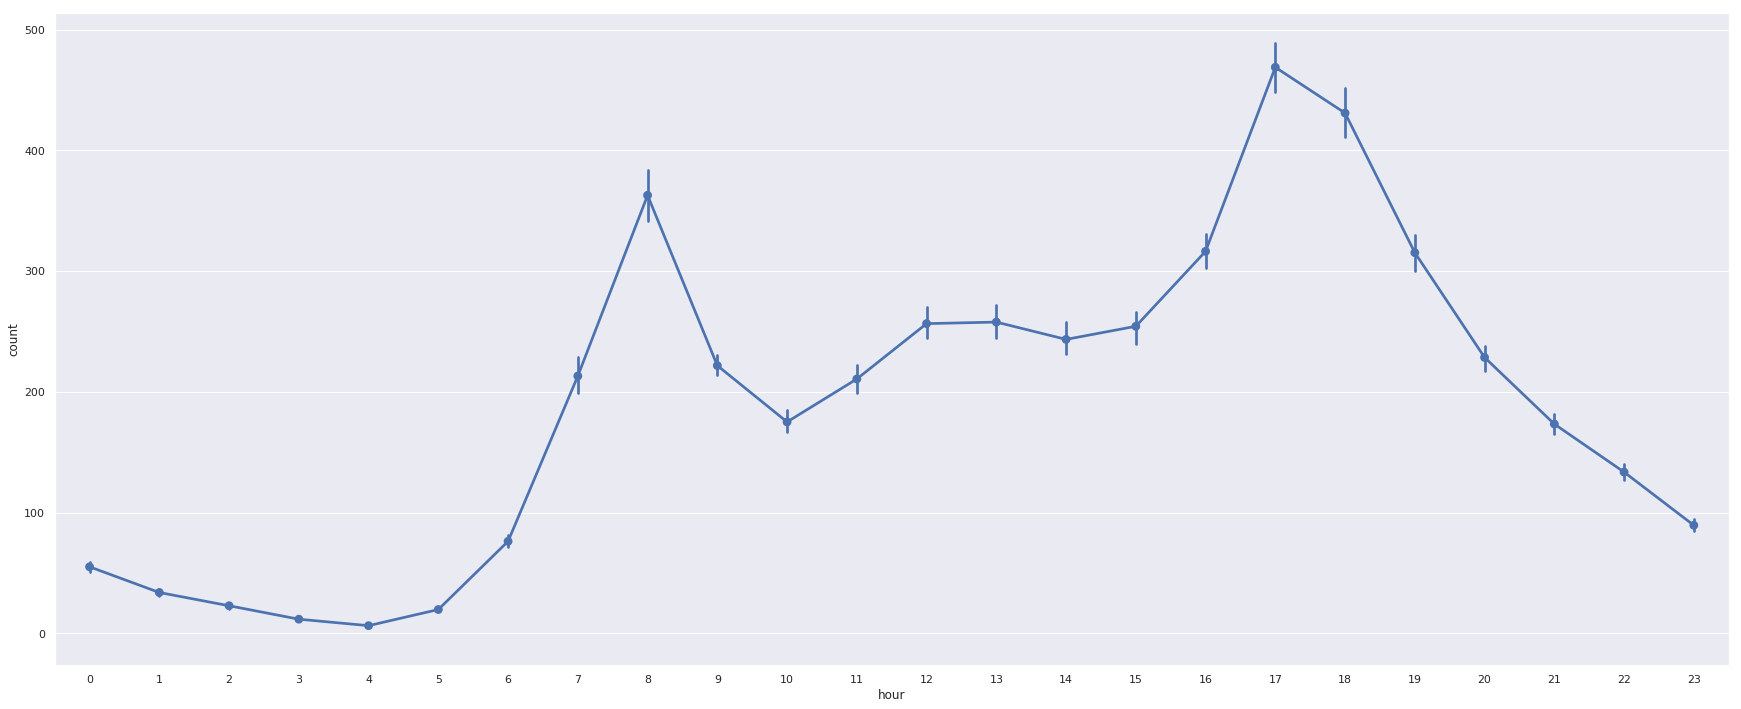

In [65]:
sns.pointplot(x=df['hour'], y=df['count'])
fig = plt.gcf()
fig.set_size_inches(30,12);

**On observe 2 pics pour les locations: 8h et 17h**

## Temp/Atemp

/home/fred/bin/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


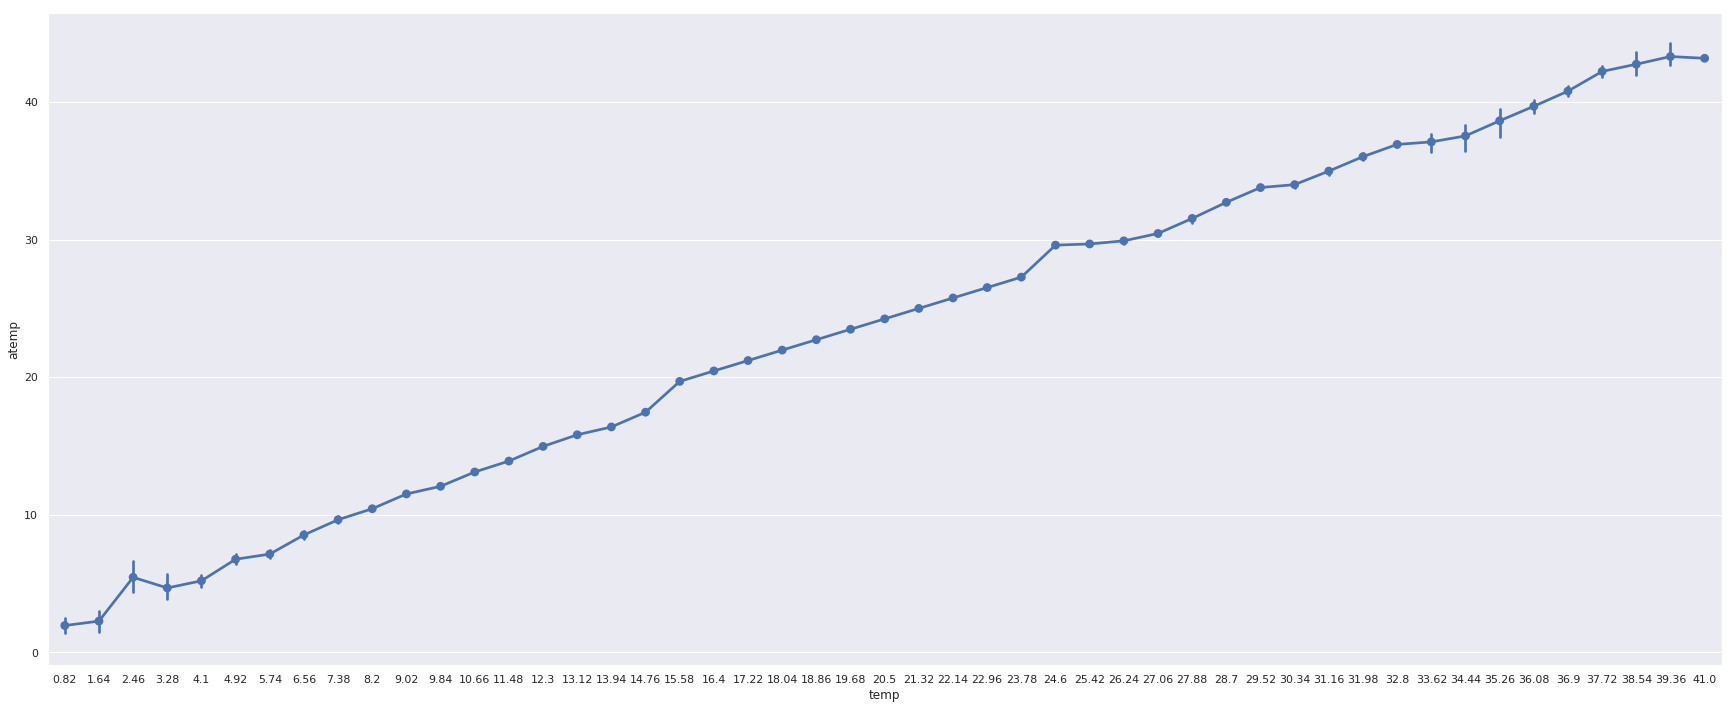

In [66]:
sns.pointplot(x=df['temp'], y=df['atemp'])
fig = plt.gcf()
fig.set_size_inches(30,12);

In [67]:
_, _, r_value, _, _ = stats.linregress(df['temp'], df['atemp'])
r_square = r_value ** 2
r_square.round(2)

0.97

**On peut supprimer la température ressentie car elle est fortement liée à la température.**

## Suppression de la colonne 'Atemp'

In [68]:
df = df.drop(labels='atemp', axis=1)

In [69]:
df.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,count,count_log,count_boxcox,dow,month,week,hour,year,day
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,81,0.0,16,2.772589,4.433145,5,1,52,0,2011,1
2011-01-01 01:00:00,1,0,0,1,9.02,80,0.0,40,3.688879,6.982674,5,1,52,1,2011,1
2011-01-01 02:00:00,1,0,0,1,9.02,80,0.0,32,3.465736,6.292274,5,1,52,2,2011,1
2011-01-01 03:00:00,1,0,0,1,9.84,75,0.0,13,2.564949,3.950910,5,1,52,3,2011,1
2011-01-01 04:00:00,1,0,0,1,9.84,75,0.0,1,0.000000,0.000000,5,1,52,4,2011,1


## Suppression des colonnes count_log et count_boxcox

In [70]:
df = df.drop(labels='count_log', axis=1)

In [71]:
df = df.drop(labels='count_boxcox', axis=1)

In [72]:
df.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,count,dow,month,week,hour,year,day
datetime,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,81,0.0,16,5,1,52,0,2011,1
2011-01-01 01:00:00,1,0,0,1,9.02,80,0.0,40,5,1,52,1,2011,1
2011-01-01 02:00:00,1,0,0,1,9.02,80,0.0,32,5,1,52,2,2011,1
2011-01-01 03:00:00,1,0,0,1,9.84,75,0.0,13,5,1,52,3,2011,1
2011-01-01 04:00:00,1,0,0,1,9.84,75,0.0,1,5,1,52,4,2011,1


## Séparation de la colonne weather en 4 parties

In [73]:
df = pd.get_dummies(df, columns=['weather'])
df.head()

,season,holiday,workingday,temp,humidity,windspeed,count,dow,month,week,hour,year,day,weather_1,weather_2,weather_3,weather_4
datetime,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,9.84,81,0.0,16,5,1,52,0,2011,1,1,0,0,0
2011-01-01 01:00:00,1,0,0,9.02,80,0.0,40,5,1,52,1,2011,1,1,0,0,0
2011-01-01 02:00:00,1,0,0,9.02,80,0.0,32,5,1,52,2,2011,1,1,0,0,0
2011-01-01 03:00:00,1,0,0,9.84,75,0.0,13,5,1,52,3,2011,1,1,0,0,0
2011-01-01 04:00:00,1,0,0,9.84,75,0.0,1,5,1,52,4,2011,1,1,0,0,0


In [74]:
df = df.drop(labels='weather_4', axis=1)
df.head()

,season,holiday,workingday,temp,humidity,windspeed,count,dow,month,week,hour,year,day,weather_1,weather_2,weather_3
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,9.84,81,0.0,16,5,1,52,0,2011,1,1,0,0
2011-01-01 01:00:00,1,0,0,9.02,80,0.0,40,5,1,52,1,2011,1,1,0,0
2011-01-01 02:00:00,1,0,0,9.02,80,0.0,32,5,1,52,2,2011,1,1,0,0
2011-01-01 03:00:00,1,0,0,9.84,75,0.0,13,5,1,52,3,2011,1,1,0,0
2011-01-01 04:00:00,1,0,0,9.84,75,0.0,1,5,1,52,4,2011,1,1,0,0


## Création de features par multiplication de l'humidity et de chaque colonne weather

In [75]:
df['hum_weath_1'] = df['temp'] * df['weather_1']
df['hum_weath_2'] = df['temp'] * df['weather_2']
df['hum_weath_3'] = df['temp'] * df['weather_3']

In [76]:
df.head()

,season,holiday,workingday,temp,humidity,windspeed,count,dow,month,week,hour,year,day,weather_1,weather_2,weather_3,hum_weath_1,hum_weath_2,hum_weath_3
datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,9.84,81,0.0,16,5,1,52,0,2011,1,1,0,0,9.84,0.0,0.0
2011-01-01 01:00:00,1,0,0,9.02,80,0.0,40,5,1,52,1,2011,1,1,0,0,9.02,0.0,0.0
2011-01-01 02:00:00,1,0,0,9.02,80,0.0,32,5,1,52,2,2011,1,1,0,0,9.02,0.0,0.0
2011-01-01 03:00:00,1,0,0,9.84,75,0.0,13,5,1,52,3,2011,1,1,0,0,9.84,0.0,0.0
2011-01-01 04:00:00,1,0,0,9.84,75,0.0,1,5,1,52,4,2011,1,1,0,0,9.84,0.0,0.0


In [77]:
df['hum_weath_1'] = df['hum_weath_1'].astype(int)
df['hum_weath_2'] = df['hum_weath_2'].astype(int)
df['hum_weath_3'] = df['hum_weath_3'].astype(int)

## Time series on DOW

In [78]:
df['previous_dow'] = df['dow'].shift(24)

In [79]:
df.head()

,season,holiday,workingday,temp,humidity,windspeed,count,dow,month,week,hour,year,day,weather_1,weather_2,weather_3,hum_weath_1,hum_weath_2,hum_weath_3,previous_dow
datetime,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,9.84,81,0.0,16,5,1,52,0,2011,1,1,0,0,9,0,0,NaN
2011-01-01 01:00:00,1,0,0,9.02,80,0.0,40,5,1,52,1,2011,1,1,0,0,9,0,0,NaN
2011-01-01 02:00:00,1,0,0,9.02,80,0.0,32,5,1,52,2,2011,1,1,0,0,9,0,0,NaN
2011-01-01 03:00:00,1,0,0,9.84,75,0.0,13,5,1,52,3,2011,1,1,0,0,9,0,0,NaN
2011-01-01 04:00:00,1,0,0,9.84,75,0.0,1,5,1,52,4,2011,1,1,0,0,9,0,0,NaN


In [80]:
df['previous_dow'] = df['previous_dow'].fillna(df['dow'][0] - 1)

In [81]:
df.head()

,season,holiday,workingday,temp,humidity,windspeed,count,dow,month,week,hour,year,day,weather_1,weather_2,weather_3,hum_weath_1,hum_weath_2,hum_weath_3,previous_dow
datetime,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,9.84,81,0.0,16,5,1,52,0,2011,1,1,0,0,9,0,0,4.0
2011-01-01 01:00:00,1,0,0,9.02,80,0.0,40,5,1,52,1,2011,1,1,0,0,9,0,0,4.0
2011-01-01 02:00:00,1,0,0,9.02,80,0.0,32,5,1,52,2,2011,1,1,0,0,9,0,0,4.0
2011-01-01 03:00:00,1,0,0,9.84,75,0.0,13,5,1,52,3,2011,1,1,0,0,9,0,0,4.0
2011-01-01 04:00:00,1,0,0,9.84,75,0.0,1,5,1,52,4,2011,1,1,0,0,9,0,0,4.0


## Rolling

In [82]:
# df['rolling_temp'] = df['temp'].rolling(4, min_periods=1).mean()

In [83]:
# df['rolling_temp'].describe()

In [84]:
# df.head()

In [85]:
# df['rolling_temp'] = df['rolling_temp'].round(2)

In [86]:
# df.head()

# Machine Learning

In [145]:
X = df.loc[:, df.columns != 'count']
y = np.log(df['count'])

In [146]:
X.shape, y.shape

((10886, 19), (10886,))

In [147]:
from sklearn.model_selection import train_test_split

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [149]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8708, 19), (8708,), (2178, 19), (2178,))

In [150]:
X_train.head()

,season,holiday,workingday,temp,humidity,windspeed,dow,month,week,hour,year,day,weather_1,weather_2,weather_3,hum_weath_1,hum_weath_2,hum_weath_3,previous_dow
datetime,,,,,,,,,,,,,,,,,,,
2011-07-06 05:00:00,3,0,1,27.88,83,6.0032,2,7,27,5,2011,6,1,0,0,27,0,0,1
2012-08-04 16:00:00,3,0,0,36.90,39,19.9995,5,8,31,16,2012,4,1,0,0,36,0,0,4
2012-07-11 15:00:00,3,0,1,32.80,41,16.9979,2,7,28,15,2012,11,1,0,0,32,0,0,1
2011-04-10 04:00:00,2,0,0,14.76,93,7.0015,6,4,14,4,2011,10,0,1,0,0,14,0,5
2011-11-19 10:00:00,4,0,0,13.12,45,16.9979,5,11,46,10,2011,19,1,0,0,13,0,0,4


In [151]:
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, MinMaxScaler, Normalizer, minmax_scale, QuantileTransformer, RobustScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_score

from xgboost import XGBRegressor

In [152]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('LASSO', Lasso(random_state=42))])))
pipelines.append(('ScaledRID', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('RID', Ridge(random_state=42))])))
pipelines.append(('ScaledKNN', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('KNN', KNeighborsRegressor(n_neighbors=2))])))
pipelines.append(('ScaledCART', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('CART', DecisionTreeRegressor(random_state=42))])))
pipelines.append(('ScaledGBM', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('GBM', GradientBoostingRegressor(random_state=42))])))
pipelines.append(('ScaledRFR', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('RFR', RandomForestRegressor(random_state=42))])))
pipelines.append(('ScaledSVR', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('SVR', SVR(kernel='linear'))])))
pipelines.append(('ScaledXGBR', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('XGBR', XGBRegressor(random_state=42))])))

#pipelines.append(('MaxAbsLR', Pipeline([('poly', PolynomialFeatures()), ('Scaler', MaxAbsScaler()), ('LR', LinearRegression())])))
#pipelines.append(('MaxAbsLASSO', Pipeline([('poly', PolynomialFeatures()), ('Scaler', MaxAbsScaler()), ('LASSO', Lasso(random_state=42))])))
#pipelines.append(('MaxAbsRID', Pipeline([('poly', PolynomialFeatures()), ('Scaler', MaxAbsScaler()), ('RID', Ridge(random_state=42))])))
#pipelines.append(('MaxAbsKNN', Pipeline([('poly', PolynomialFeatures()), ('Scaler', MaxAbsScaler()), ('KNN', KNeighborsRegressor(n_neighbors=2))])))
#pipelines.append(('MaxAbsCART', Pipeline([('poly', PolynomialFeatures()), ('Scaler', MaxAbsScaler()), ('CART', DecisionTreeRegressor(random_state=42))])))
#pipelines.append(('MaxAbsGBM', Pipeline([('poly', PolynomialFeatures()), ('Scaler', MaxAbsScaler()), ('GBM', GradientBoostingRegressor(random_state=42))])))
#pipelines.append(('MaxAbsRFR', Pipeline([('poly', PolynomialFeatures()), ('Scaler', MaxAbsScaler()), ('RFR', RandomForestRegressor(random_state=42))])))
#pipelines.append(('MaxAbsSVR', Pipeline([('poly', PolynomialFeatures()), ('Scaler', MaxAbsScaler()), ('SVR', SVR(kernel='linear'))])))
#pipelines.append(('MaxAbsXGBR', Pipeline([('poly', PolynomialFeatures()), ('Scaler', MaxAbsScaler()), ('XGBR', XGBRegressor(random_state=42))])))

#pipelines.append(('MinMaxLR', Pipeline([('poly', PolynomialFeatures()), ('Scaler', MinMaxScaler()), ('LR', LinearRegression())])))
#pipelines.append(('MinMaxLASSO', Pipeline([('poly', PolynomialFeatures()), ('Scaler', MinMaxScaler()), ('LASSO', Lasso(random_state=42))])))
#pipelines.append(('MinMaxRID', Pipeline([('poly', PolynomialFeatures()), ('Scaler', MinMaxScaler()), ('RID', Ridge(random_state=42))])))
#pipelines.append(('MinMaxKNN', Pipeline([('poly', PolynomialFeatures()), ('Scaler', MinMaxScaler()), ('KNN', KNeighborsRegressor(n_neighbors=2))])))
#pipelines.append(('MinMaxCART', Pipeline([('poly', PolynomialFeatures()), ('Scaler', MinMaxScaler()), ('CART', DecisionTreeRegressor(random_state=42))])))
#pipelines.append(('MinMaxGBM', Pipeline([('poly', PolynomialFeatures()), ('Scaler', MinMaxScaler()), ('GBM', GradientBoostingRegressor(random_state=42))])))
#pipelines.append(('MinMaxRFR', Pipeline([('poly', PolynomialFeatures()), ('Scaler', MinMaxScaler()), ('RFR', RandomForestRegressor(random_state=42))])))
#pipelines.append(('MinMaxSVR', Pipeline([('poly', PolynomialFeatures()), ('Scaler', MinMaxScaler()), ('SVR', SVR(kernel='linear'))])))
#pipelines.append(('MinMaxXGBR', Pipeline([('poly', PolynomialFeatures()), ('Scaler', MinMaxScaler()), ('XGBR', XGBRegressor(random_state=42))])))

#pipelines.append(('NormalizerLR', Pipeline([('poly', PolynomialFeatures()), ('Scaler', Normalizer()), ('LR', LinearRegression())])))
#pipelines.append(('NormalizerLASSO', Pipeline([('poly', PolynomialFeatures()), ('Scaler', Normalizer()), ('LASSO', Lasso(random_state=42))])))
#pipelines.append(('NormalizerRID', Pipeline([('poly', PolynomialFeatures()), ('Scaler', Normalizer()), ('RID', Ridge(random_state=42))])))
#pipelines.append(('NormalizerKNN', Pipeline([('poly', PolynomialFeatures()), ('Scaler', Normalizer()), ('KNN', KNeighborsRegressor(n_neighbors=2))])))
#pipelines.append(('NormalizerCART', Pipeline([('poly', PolynomialFeatures()), ('Scaler', Normalizer()), ('CART', DecisionTreeRegressor(random_state=42))])))
#pipelines.append(('NormalizerGBM', Pipeline([('poly', PolynomialFeatures()), ('Scaler', Normalizer()), ('GBM', GradientBoostingRegressor(random_state=42))])))
#pipelines.append(('NormalizerRFR', Pipeline([('poly', PolynomialFeatures()), ('Scaler', Normalizer()), ('RFR', RandomForestRegressor(random_state=42))])))
#pipelines.append(('NormalizerSVR', Pipeline([('poly', PolynomialFeatures()), ('Scaler', Normalizer()), ('SVR', SVR(kernel='linear'))])))
#pipelines.append(('NormalizerXGBR', Pipeline([('poly', PolynomialFeatures()), ('Scaler', Normalizer()), ('XGBR', XGBRegressor(random_state=42))])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(random_state=42)
    cv_results = -cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_log_error')
    results.append(np.sqrt(cv_results))
    names.append(name)
    msg = "{}: {} ({})".format(name, cv_results.mean(), cv_results.std())
    print(msg)

/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/metrics/regression.py:314: RuntimeWarning: invalid value encountered in log
  return mean_squared_error(np.log(y_true + 1), np.log(y_pred + 1),


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

**BEST MODEL -> ScaledXGBR: 0.014855820691637616 (0.0009476916349848864)**

In [ ]:
# from sklearn.model_selection import GridSearchCV

# poly = PolynomialFeatures().fit_transform(X_train)
# rescaledX = StandardScaler().fit_transform(poly)
# parameters = {
#     'learning_rate': [0.1, 0.3, 0.5, 0.7], #[0, 1] 0.3
#     'max_depth': [6, 7, 8], #[0, inf] 6
#     'min_child_weight': [3, 4, 5], #[0, inf] 1
#     'subsample': [0.6, 0.7, 0.8] #[0, 1] 1
# }
# #colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=4, subsample=0.7
# model = XGBRegressor(random_state=42)
# kfold = KFold(random_state=42)
# grid = GridSearchCV(estimator=model, param_grid=parameters, scoring='neg_mean_squared_log_error', cv=kfold)
# grid_result = grid.fit(rescaledX, y_train)

# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(-means, stds, params):
#     print("{} ({}) with: {}".format(mean, stdev, param))

# print("Best: {} using {}".format(grid_result.best_score_, grid_result.best_params_))

# ----------------------------------------TEST-----------------------------------------

In [ ]:
base_path = get_path_for_dataset('bike-sharing/test.csv')
base_path

In [ ]:
df_test = pd.read_csv(os.path.join(base_path))

In [ ]:
df_test.head()

In [ ]:
df_test['datetime'] = pd.to_datetime(df_test['datetime'])

In [ ]:
df_test['dow'] = df_test['datetime'].dt.dayofweek

In [ ]:
df_test['month'] = df_test['datetime'].dt.month

In [ ]:
df_test['week'] = df_test['datetime'].dt.week

In [ ]:
df_test['hour'] = df_test['datetime'].dt.hour

In [ ]:
df_test['year'] = df_test['datetime'].dt.year

In [ ]:
df_test['day'] = df_test['datetime'].dt.day

In [ ]:
df_test.head()

In [ ]:
df_test = df_test.set_index(df_test['datetime'])

In [ ]:
df_test = df_test.drop(labels='datetime', axis=1)

In [ ]:
df_test = df_test.drop(labels='atemp', axis=1)

In [ ]:
df_test = pd.get_dummies(df_test, columns=['weather'])
df_test.head()

In [ ]:
df_test = df_test.drop(labels='weather_4', axis=1)
df_test.head()

In [ ]:
df_test['hum_weath_1'] = df_test['temp'] * df_test['weather_1']
df_test['hum_weath_2'] = df_test['temp'] * df_test['weather_2']
df_test['hum_weath_3'] = df_test['temp'] * df_test['weather_3']

In [ ]:
df_test.head()

In [ ]:
df_test['hum_weath_1'] = df_test['hum_weath_1'].astype(int)
df_test['hum_weath_2'] = df_test['hum_weath_2'].astype(int)
df_test['hum_weath_3'] = df_test['hum_weath_3'].astype(int)

In [ ]:
df_test['previous_dow'] = df_test['dow'].shift(24)

In [ ]:
df_test.head()

In [ ]:
df_test['previous_dow'] = df_test['previous_dow'].fillna(df_test['dow'][0] - 1)

In [ ]:
df_test.head()

In [ ]:
# df_test['rolling_temp'] = df_test['temp'].rolling(4, min_periods=1).mean()

In [ ]:
# df_test['rolling_temp'].describe()

In [ ]:
# df_test.head()

In [ ]:
# df_test['rolling_temp'] = df_test['rolling_temp'].round(2)

In [ ]:
# df_test.head()

In [ ]:
standardscaler = StandardScaler()
model = GradientBoostingRegressor()
#model = XGBRegressor(colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=4, subsample=0.7, random_state=42)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
model.predict(df_test)

In [ ]:
pipe = Pipeline([('poly', PolynomialFeatures()), ('StandardScaler', standardscaler), ('XGBR', model)])
pipe.fit(X_train, y_train)
y_pred = np.exp(pipe.predict(df_test)).round(0)
y_pred

In [ ]:
df_sample_submission = pd.DataFrame({'datetime': df_test.index, 'count': y_pred})

In [ ]:
sample_submission = pd.DataFrame.to_csv(df_sample_submission, index=False)
with open ('../submissions/sample_submission.csv', 'w') as f:
    f.write(sample_submission)

**Score: 0.39995**